# Synthetic data

### Brief description

This Jupyter notebook is a supplementary material contaning the code needed to generate part of the synthetic data and reproduce part of the figures and results of this course. This code uses the open-source Python toolkit for geophysical modeling and inversion [Fatiando a Terra](http://www.fatiando.org/index.html).

This code calculates all the synthetic data sets used in the numerical applications.

**Note:** A Jupyter notebook is a document that incorporates text, results, figures, and the Python source code to produce them. If you are viewing this from the URL https://nbviewer.jupyter.org/, the document will be static (not executable). To run the code, you will need to download the notebook and install all the required dependencies. For installing the Fatiando a Terra and all the required dependencies, please follow the instructions shown in http://www.fatiando.org/install.html.

### Import the required dependencies

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
from mpl_toolkits.axes_grid1 import AxesGrid, make_axes_locatable
import cPickle as pickle
import datetime
from IPython.display import Markdown as md
from IPython.display import display as dp
import string as st

from __future__ import division

import auxiliary_functions as af

import fatiando
from fatiando import gridder
from fatiando.mesher import Prism
from fatiando.gridder import regular

#from fatiando.gravmag import prism
from fatiando.gravmag import _prism_numpy as prism

from fatiando.vis import myv
from fatiando.utils import ang2vec, contaminate
from fatiando.constants import G

In [2]:
plt.rcParams['font.size'] = 6
plt.rcParams['axes.labelsize'] = 8
plt.rcParams['xtick.labelsize'] = 6
plt.rcParams['ytick.labelsize'] = 6
plt.rcParams['legend.fontsize'] = 6
plt.rcParams['xtick.major.pad'] = 3
plt.rcParams['ytick.major.pad'] = 3

In [3]:
notebook_name = 'synthetic_data.ipynb'

In [4]:
print("Version of Fatiando a Terra used: {}".format(fatiando.__version__))

Version of Fatiando a Terra used: unknown


In [5]:
saved_files = [] #list of saved files

### Load the synthetic model formed by two rectangular prisms

In [6]:
with open('results\\model.pickle') as f:
        full_model = pickle.load(f)

In [7]:
with open('results\\model_pole.pickle') as f:
        full_model_pole = pickle.load(f)

### Load the 2D grid of points

In [8]:
with open('results\\regular_grid.pickle') as f:
        regular_grid = pickle.load(f)

In [9]:
with open('results\\airborne_survey.pickle') as f:
        airborne_survey = pickle.load(f)

In [10]:
with open('results\\interpolating.pickle') as f:
        interpolating = pickle.load(f)

In [11]:
with open('results\\coarse_grid.pickle') as f:
        coarse_grid = pickle.load(f)

### Define the coordinates on the observation surface

#### Regular grid

In [12]:
#coordinates x and y of the data
xr, yr = regular(regular_grid['area'], regular_grid['shape'])

#vertical coordinates of the data
zr = af.observation_surface(xr,yr)

In [13]:
print 'zr min = %.3f \n zr max = %.3f' % (np.min(zr), np.max(zr))

zr min = -1249.971 
 zr max = -551.307


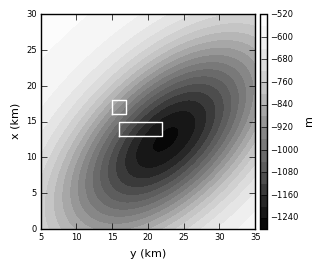

In [14]:
af.plotmap(xr, yr, zr, regular_grid['shape'], regular_grid['area'], 
           color_scheme = 'Greys_r',
           prism_projection = True, projection_style = '-w', 
           model = full_model['projection'], unit = 'm')

In [15]:
caption = "Undulating surface (grayscale) on which we calculate the synthetic data produced by the simulated \
prisms (Figure 3). The white rectangles represent the horizontal projection \
of the simulated prisms."

In [16]:
dp(md(caption))

Undulating surface (grayscale) on which we calculate the synthetic data produced by the simulated prisms (Figure 3). The white rectangles represent the horizontal projection of the simulated prisms.

#### Airborne survey

In [17]:
#coordinates x and y of the data
xa, ya = regular(airborne_survey['area'], airborne_survey['shape'])

#vertical coordinates of the data
za = af.observation_surface(xa,ya)

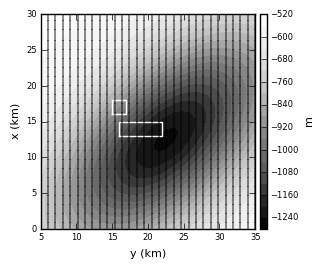

In [18]:
af.plotmap(xa, ya, za, airborne_survey['shape'], airborne_survey['area'], 
           color_scheme = 'Greys_r',  
           prism_projection = True, projection_style = '-w', 
           model = full_model['projection'], unit = 'm',
           observations=True, point_style='.k', point_size=1)

In [19]:
caption = "Undulating surface on which we calculate the total-field anomaly (Figure 13a) and the total-gradient \
amplitude (Figure 14a) produced by the simulated prisms (Figure 3). The white rectangles represent the \
horizontal projection of the simulated prisms (Figure 3) and the black dots represent the horizontal location of a \
data set simulating an airborne survey. The black dots are located on a regular grid of $%d \\times %d$ points, \
separated by $\\approx %.1f$ m and $\\approx %.1f$ m intervals along, respectively, the $x$ and $y$ directions." \
% (airborne_survey['shape'][0], airborne_survey['shape'][1], airborne_survey['spacing'][0], airborne_survey['spacing'][1])

In [20]:
dp(md(caption))

Undulating surface on which we calculate the total-field anomaly (Figure 13a) and the total-gradient amplitude (Figure 14a) produced by the simulated prisms (Figure 3). The white rectangles represent the horizontal projection of the simulated prisms (Figure 3) and the black dots represent the horizontal location of a data set simulating an airborne survey. The black dots are located on a regular grid of $120 \times 30$ points, separated by $\approx 252.1$ m and $\approx 1034.5$ m intervals along, respectively, the $x$ and $y$ directions.

#### Interpolating points

In [21]:
#coordinates x and y of the data
xi, yi = regular(interpolating['area'], interpolating['shape'])

#vertical coordinates of the data
zi = af.observation_surface(xi,yi)

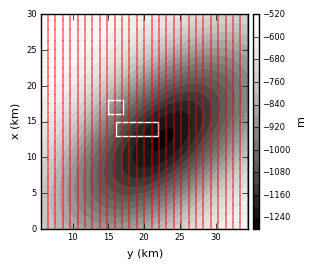

In [22]:
af.plotmap(xi, yi, zi, interpolating['shape'], interpolating['area'], 
           color_scheme = 'Greys_r', 
           prism_projection = True, projection_style = '-w', 
           model = full_model['projection'], unit = 'm', 
           observations=True, point_style='.r', point_size=1)

In [23]:
caption = "Undulating surface on which we calculate the synthetic data \
produced by the simulated prisms (Figure 3). The white rectangles represent the \
horizontal projection of the simulated prisms and the red dots represent the horizontal location of the points \
at which the synthetic data are interpolated. The red dots are located on a regular grid of $%d \\times %d$ \
points, separated by $\\approx %.1f$ m and \
$\\approx %.1f$ m intervals along, respectively, the $x$ and $y$ directions." \
% (interpolating['shape'][0], interpolating['shape'][1], interpolating['spacing'][0], interpolating['spacing'][1])

In [24]:
dp(md(caption))

Undulating surface on which we calculate the synthetic data produced by the simulated prisms (Figure 3). The white rectangles represent the horizontal projection of the simulated prisms and the red dots represent the horizontal location of the points at which the synthetic data are interpolated. The red dots are located on a regular grid of $120 \times 29$ points, separated by $\approx 252.1$ m and $\approx 1034.5$ m intervals along, respectively, the $x$ and $y$ directions.

#### Coarse grid

In [25]:
#coordinates x and y of the data
xc, yc = regular(coarse_grid['area'], coarse_grid['shape'])

#vertical coordinates of the data
zc = af.observation_surface(xc,yc)

### Synthetic data calculated at the regular grid points on the observation surface

#### Gravity anomaly

Gravity anomaly (noise-free) produced by the synthetic prisms (Figure 3) on the observation surface (Figure 4). This anomaly is calculated with equation 1.

In [26]:
gz_obsur_rgrid = prism.gz(xr,yr,zr,full_model['model'])

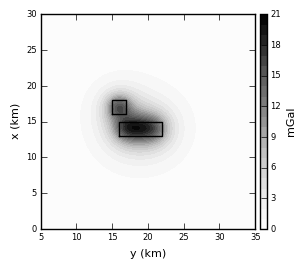

In [27]:
af.plotmap(xr, yr, gz_obsur_rgrid, regular_grid['shape'], regular_grid['area'], 
           color_scheme = 'Greys', 
           prism_projection = True, projection_style = '-k', 
           model = full_model['projection'], unit = 'mGal')

In [28]:
caption = "Gravity anomaly (noise-free) produced by the synthetic bodies (Figure 3) \
on a regular grid of $%d \\times %d$ points located on the undulating surface shown in Figure 4. \
The black rectangles represent the horizontal projection of the synthetic bodies (Figure 3)." \
% (regular_grid['shape'][0], regular_grid['shape'][1])

In [29]:
dp(md(caption))

Gravity anomaly (noise-free) produced by the synthetic bodies (Figure 3) on a regular grid of $180 \times 180$ points located on the undulating surface shown in Figure 4. The black rectangles represent the horizontal projection of the synthetic bodies (Figure 3).

#### Total-field anomaly

Total-field anomaly (noise-free) produced by the synthetic prisms (Figure 3) on the observation surface (Figure 4). This anomaly is calculated with equation 8.

In [30]:
inc, dec = full_model['geomag_field']

In [31]:
tf_obsur_rgrid = prism.tf(xr,yr,zr,full_model['model'],inc,dec)

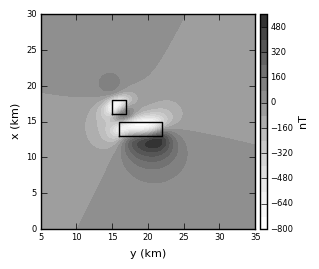

In [32]:
af.plotmap(xr, yr, tf_obsur_rgrid, regular_grid['shape'], regular_grid['area'], 
           color_scheme = 'Greys', 
           prism_projection = True, projection_style = '-k', 
           model = full_model['projection'], unit = 'nT', 
           ranges = af.scale_bounds(tf_obsur_rgrid, div=True))

In [33]:
caption = "Total-field anomaly (noise-free) produced by the synthetic bodies (Figure 3) \
on a regular grid of $%d \\times %d$ points located on the undulating surface shown in Figure 4. \
The black rectangles represent the horizontal projection of the synthetic bodies (Figure 3)." \
% (regular_grid['shape'][0], regular_grid['shape'][1])

In [34]:
dp(md(caption))

Total-field anomaly (noise-free) produced by the synthetic bodies (Figure 3) on a regular grid of $180 \times 180$ points located on the undulating surface shown in Figure 4. The black rectangles represent the horizontal projection of the synthetic bodies (Figure 3).

#### True RTP anomaly

True RTP anomaly (noise-free) produced by the produced by the synthetic prisms (Figure 3) on the observation surface (Figure 4). This anomaly is calculated with equation 8.

In [35]:
inc, dec = full_model_pole['geomag_field']

In [36]:
tf_RTP_obsur_rgrid = prism.tf(xr,yr,zr,full_model_pole['model'],inc,dec)

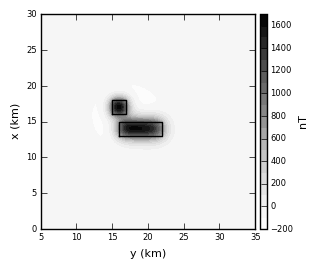

In [37]:
af.plotmap(xr, yr, tf_RTP_obsur_rgrid, regular_grid['shape'], regular_grid['area'], 
           color_scheme = 'Greys', 
           prism_projection = True, projection_style = '-k', 
           model = full_model_pole['projection'], unit = 'nT')

In [38]:
caption = "True RTP anomaly (noise-free) produced by the synthetic bodies (Figure 3) \
on a regular grid of $%d \\times %d$ points located on the undulating surface shown in Figure 4. \
The black rectangles represent the horizontal projection of the synthetic bodies (Figure 3)." \
% (regular_grid['shape'][0], regular_grid['shape'][1])

In [39]:
dp(md(caption))

True RTP anomaly (noise-free) produced by the synthetic bodies (Figure 3) on a regular grid of $180 \times 180$ points located on the undulating surface shown in Figure 4. The black rectangles represent the horizontal projection of the synthetic bodies (Figure 3).

### Synthetic data calculated at the simulated airborne survey points on the observation surface and continuation surface

#### Gravity anomaly

In [40]:
gz_noise = 1.
gz_obsur_arsurvey = contaminate(prism.gz(xa,ya,za,full_model['model']), gz_noise, seed=32)

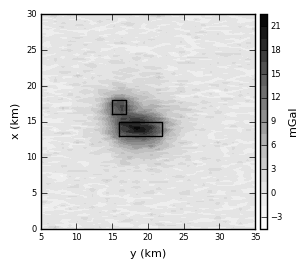

In [41]:
af.plotmap(xa, ya, gz_obsur_arsurvey, airborne_survey['shape'], airborne_survey['area'],
           color_scheme = 'Greys',  
            prism_projection = True, projection_style = '-k', 
            model = full_model['projection'], unit = 'mGal')

In [42]:
caption = "Gravity anomaly produced by the synthetic prisms (Figure 3) at the points simulating an \
airborn survey on the undulating surface (Figure 4). This anomaly is calculated with equation 1 \
and is contaminated by a pseudo-random Gaussian noise having null mean and standard deviation equal to %.1f mGal. \
The black rectangles represent the horizontal projection of the simulated prisms." \
% (gz_noise)

In [43]:
dp(md(caption))

Gravity anomaly produced by the synthetic prisms (Figure 3) at the points simulating an airborn survey on the undulating surface (Figure 4). This anomaly is calculated with equation 1 and is contaminated by a pseudo-random Gaussian noise having null mean and standard deviation equal to 1.0 mGal. The black rectangles represent the horizontal projection of the simulated prisms.

#### Total-field anomaly

In [44]:
inc, dec = full_model['geomag_field']

In [45]:
tf_noise = 5.
tf_obsur_arsurvey = contaminate(prism.tf(xa,ya,za,full_model['model'],inc,dec), tf_noise, seed=47)

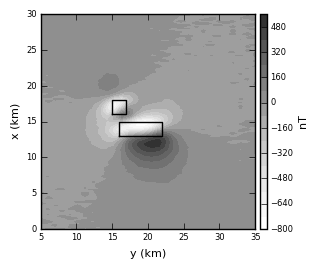

In [46]:
af.plotmap(xa, ya, tf_obsur_arsurvey, airborne_survey['shape'], airborne_survey['area'], 
           color_scheme = 'Greys', 
           prism_projection = True, projection_style = '-k', 
           model = full_model['projection'], unit = 'nT', 
           ranges = af.scale_bounds(tf_obsur_arsurvey, div=True))

In [47]:
caption = "Total-field anomaly produced by the synthetic prisms (Figure 3) at \
the points simulating an airborne survey located on the undulating surface (Figure 4). \
This anomaly is calculated with equation 1 and is contaminated by a pseudo-random Gaussian noise having \
null mean and standard deviation equal to %.1f nT. The black rectangles represent the horizontal projection \
of the simulated prisms." % (tf_noise)

In [48]:
dp(md(caption))

Total-field anomaly produced by the synthetic prisms (Figure 3) at the points simulating an airborne survey located on the undulating surface (Figure 4). This anomaly is calculated with equation 1 and is contaminated by a pseudo-random Gaussian noise having null mean and standard deviation equal to 5.0 nT. The black rectangles represent the horizontal projection of the simulated prisms.

In [49]:
#Save the total-field anomaly in a txt file
now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
header = """# Generated by {name} on {date}
# Noise-corrupted total-field anomaly calculated at a regular grid simulating
# an airborne survey on the observation surface
# shape (nx, ny): {shape}
# area [x1, x2, y1, y2]: {area}
# x (m)    y (m)    z (m)    total-field anomaly (nT)
""".format(name=notebook_name, date=now, shape=regular_grid['shape'], area=regular_grid['area'])
file_name = 'results\\tf_noisy_asur.txt'
with open(file_name, 'w') as f:
    f.write(header)
    np.savetxt(f, zip(xa, ya, za, tf_obsur_arsurvey), fmt='%.5f')
saved_files.append(file_name)

#### Total gradient amplitude

In [50]:
inc, dec = full_model['geomag_field']

In [51]:
delta = 5.

In [52]:
dxtf_obsur_arsurvey = (prism.tf(xa+delta,ya,za,full_model['model'],inc,dec) - \
                       prism.tf(xa-delta,ya,za,full_model['model'],inc,dec))/(2.*delta)

dytf_obsur_arsurvey = (prism.tf(xa,ya+delta,za,full_model['model'],inc,dec) - \
                       prism.tf(xa,ya-delta,za,full_model['model'],inc,dec))/(2.*delta)

dztf_obsur_arsurvey = (prism.tf(xa,ya,za+delta,full_model['model'],inc,dec) - \
                       prism.tf(xa,ya,za-delta,full_model['model'],inc,dec))/(2.*delta)

In [53]:
tga = np.sqrt(dxtf_obsur_arsurvey**2. + dytf_obsur_arsurvey**2. + dztf_obsur_arsurvey**2.)

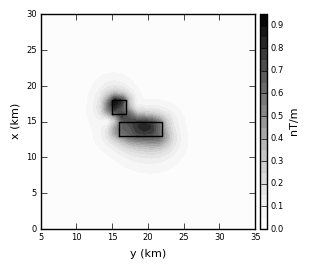

In [54]:
af.plotmap(xa, ya, tga, airborne_survey['shape'], airborne_survey['area'], 
           color_scheme = 'Greys',  
           prism_projection = True, projection_style = '-k', 
           model = full_model['projection'], unit = 'nT/m')

In [55]:
caption = "Total gradient amplitude (noise-free) produced by the synthetic prisms (Figure 3) at \
the points simulating an airborne survey located on the undulating surface (Figure 4). \
The derivatives were calculated by using equation 8 and a central finite difference approximation with constant \
spacing of %.1f m. The black rectangles represent the horizontal projection \
of the simulated prisms." % (delta)

In [56]:
dp(md(caption))

Total gradient amplitude (noise-free) produced by the synthetic prisms (Figure 3) at the points simulating an airborne survey located on the undulating surface (Figure 4). The derivatives were calculated by using equation 8 and a central finite difference approximation with constant spacing of 5.0 m. The black rectangles represent the horizontal projection of the simulated prisms.

In [57]:
#Save the total-field anomaly in a txt file
now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
header = """# Generated by {name} on {date}
# Noise-free total gradient amplitude calculated numerically at a regular 
# grid simulating an airborne survey on the observation surface
# shape (nx, ny): {shape}
# area [x1, x2, y1, y2]: {area}
# x (m)    y (m)    z (m)    total gradient amplitude (nT/m)
""".format(name=notebook_name, date=now, shape=regular_grid['shape'], area=regular_grid['area'])
file_name = 'results\\tga_asur.txt'
with open(file_name, 'w') as f:
    f.write(header)
    np.savetxt(f, zip(xa, ya, za, tga), fmt='%.5f')
saved_files.append(file_name)

#### Total-field anomaly at the continuation surface

In [58]:
#vertical coordinates of the data
zcont_cte = -1400.
zcont = np.zeros_like(xa) + zcont_cte

In [59]:
tf_contsur_arsurvey = prism.tf(xa,ya,zcont,full_model['model'],inc,dec)

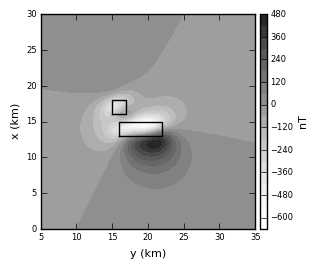

In [60]:
af.plotmap(xa, ya, tf_contsur_arsurvey, airborne_survey['shape'], airborne_survey['area'], 
           color_scheme = 'Greys', 
           prism_projection = True, projection_style = '-k', 
           model = full_model['projection'], unit = 'nT', 
           ranges = af.scale_bounds(tf_contsur_arsurvey, div=True))

In [61]:
caption = "Noise-free total-field anomaly produced by the synthetic prisms (Figure 3) \
at the points simulating an airborne survey on a planar surface at $z = %.1f$ m. \
The black rectangles represent the horizontal projection of the simulated prisms." \
% (zcont_cte)

In [62]:
dp(md(caption))

Noise-free total-field anomaly produced by the synthetic prisms (Figure 3) at the points simulating an airborne survey on a planar surface at $z = -1400.0$ m. The black rectangles represent the horizontal projection of the simulated prisms.

### Synthetic data calculated at the interpolating points on the observation surface

#### Gravity anomaly

In [63]:
gz_obsur_interp = prism.gz(xi,yi,zi,full_model['model'])

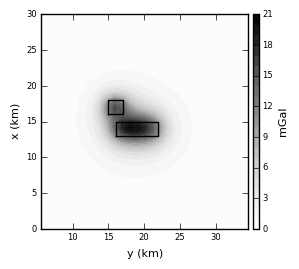

In [64]:
af.plotmap(xi, yi, gz_obsur_interp, interpolating['shape'], interpolating['area'],
           color_scheme = 'Greys', 
           prism_projection = True, projection_style = '-k', 
           model = full_model['projection'], unit = 'mGal')

In [65]:
caption = "Gravity anomaly (noise-free) produced by the synthetic bodies (Figure 3) \
at the interpolating points. The black rectangles represent the horizontal projection of the synthetic bodies \
(Figure 3)."

In [66]:
dp(md(caption))

Gravity anomaly (noise-free) produced by the synthetic bodies (Figure 3) at the interpolating points. The black rectangles represent the horizontal projection of the synthetic bodies (Figure 3).

### Synthetic data calculated at the regular coarse grid points on the observation surface

#### Total-field and RTP anomalies

Total-field (equation 8) and RTP (equation 9) anomalies (noise-free) produced by the synthetic prisms (Figure 3) on the observation surface (Figure 4).

In [67]:
inc, dec = full_model['geomag_field']

In [68]:
tf_obsur_cgrid = prism.tf(xc,yc,zc,full_model['model'],inc,dec)

In [69]:
RTP_obsur_cgrid = prism.tf(xc,yc,zc,full_model_pole['model'],90.,0.)

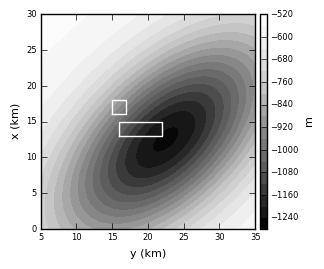

In [70]:
file_name = 'figs\\Fig4'
af.plotmap(xc, yc, zc, coarse_grid['shape'], coarse_grid['area'], 
           color_scheme = 'Greys_r',  
           prism_projection = True, projection_style = '-w', 
           model = full_model['projection'], unit = 'm',
           figure_name = file_name+'.png')
saved_files.append(file_name+'.png')

In [71]:
caption = "Undulating surface (grayscale) on which we calculate the synthetic data produced by the simulated \
prisms (Figure 3). The white rectangles represent the horizontal projection \
of the simulated prisms."

In [72]:
dp(md(caption))

Undulating surface (grayscale) on which we calculate the synthetic data produced by the simulated prisms (Figure 3). The white rectangles represent the horizontal projection of the simulated prisms.

In [73]:
#Save the total-field anomaly in a txt file
now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
header = """# Generated by {name} on {date}
# Noise-free total-field anomaly calculated with equation 8 at a regular grid on the
# observation surface
# shape (nx, ny): {shape}
# area [x1, x2, y1, y2]: {area}
# x (m)    y (m)    z (m)    total-field anomaly (nT)
""".format(name=notebook_name,date=now, shape=coarse_grid['shape'], area=coarse_grid['area'])
file_name = 'results\\tf_obsur_cgrid.txt'
with open(file_name, 'w') as f:
    f.write(header)
    np.savetxt(f, zip(xc, yc, zc, tf_obsur_cgrid), fmt='%.5f')
saved_files.append(file_name)

In [74]:
#Save the RTP anomaly in a txt file
now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
header = """# Generated by {name} on {date}
# True RTP anomaly (noise-free) calculated with equation 9 at a regular grid on the
# observation surface
# shape (nx, ny): {shape}
# area [x1, x2, y1, y2]: {area}
# x (m)    y (m)    z (m)    total-field anomaly (nT)
""".format(name=notebook_name, date=now, shape=coarse_grid['shape'], area=coarse_grid['area'])
file_name = 'results\\RTP_obsur_cgrid.txt'
with open(file_name, 'w') as f:
    f.write(header)
    np.savetxt(f, zip(xc, yc, zc, RTP_obsur_cgrid), fmt='%.5f')
saved_files.append(file_name)

### Saved files

In [75]:
with open('reports\\report_%s.md' % notebook_name[:st.index(notebook_name,'.')], 'w') as f:
    f.write('# Saved files \n')
    now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
    header = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)
    f.write('\n\n'+header+'\n\n')
    for i, sf in enumerate(saved_files):
        print '%d  %s' % (i+1,sf)
        f.write('*  `%s` \n' % (sf))

1  results\tf_noisy_asur.txt
2  results\tga_asur.txt
3  figs\Fig4.png
4  results\tf_obsur_cgrid.txt
5  results\RTP_obsur_cgrid.txt
